# Libraries

In [151]:
#pandas and numpy for data processing
import pandas as pd
import numpy as np

#date processing
import calendar
from datetime import timedelta

#modelling
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error

#for eda, plots and graphs
from matplotlib import pyplot
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

#to remove code warnings
import warnings
warnings.filterwarnings('ignore')

# Pre-Processing and EDA

In [152]:
#importing data
df = pd.read_csv('Dataset\BreadBasket_DMS.csv')
#data types of columns
df.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [153]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [154]:
df['Transaction'].max()

9684

# Sanity Checks

##  Checking for null feilds

In [155]:
for col in df.columns:
    print(df[col].isnull().sum())

0
0
0
0


## Unique items

In [156]:
df['Item'].sort_values().unique()

array(['Adjustment', 'Afternoon with the baker', 'Alfajores',
       'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell',
       'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread',
       'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake',
       'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew',
       'Chicken sand', 'Chimichurri Oil', 'Chocolates',
       'Christmas common', 'Coffee', 'Coffee granules ', 'Coke',
       'Cookies', 'Crepes', 'Crisps', 'Drinking chocolate spoons ',
       'Duck egg', 'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches",
       'Empanadas', 'Extra Salami or Feta', 'Fairy Doors', 'Farm House',
       'Focaccia', 'Frittata', 'Fudge', 'Gift voucher',
       'Gingerbread syrup', 'Granola', 'Hack the stack',
       'Half slice Monster ', 'Hearty & Seasonal', 'Honey',
       'Hot chocolate', 'Jam', 'Jammie Dodgers', 'Juice',
       'Keeping It Local', 'Kids biscuit', 'Lemon and coconut',
       'Medialuna', 'Mighty Protein', 'Mineral wat

In [157]:
df['Item'].nunique()

95

## Data Duration

In [158]:
df['Date'].min(), df['Date'].max()

('2016-10-30', '2017-04-09')

## Total number of transactions

In [159]:
len(df)

21293

# Data Cleaning and pre-processing

## Removing Null transactions

In [160]:
df[df['Item'] == 'NONE'].head()

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE


In [161]:
df = df[df['Item'] != 'NONE']

In [162]:
len(df)

20507

## Date Time Extractions

In [163]:
date = pd.to_datetime(df['Date'])

df['Year'] = date.dt.year
df['Month'] = date.dt.month.apply(lambda x: calendar.month_abbr[x])
df['Day'] = date.dt.day

weekday_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Weekday'] = date.dt.weekday.apply(lambda x: weekday_map[x])

df['Hours'], df['Mins'], df['Secs'] = df['Time'].str.split(':').str

## Get top 10 most frequent Items

In [164]:
n = 10
items = df['Item'].value_counts()[:n].index.tolist()
items

['Coffee',
 'Bread',
 'Tea',
 'Cake',
 'Pastry',
 'Sandwich',
 'Medialuna',
 'Hot chocolate',
 'Cookies',
 'Brownie']

In [165]:
df['Item'].value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Raw bars           1
Gift voucher       1
Bacon              1
Polenta            1
The BART           1
Name: Item, Length: 94, dtype: int64

In [166]:
df.tail()

,Date,Time,Transaction,Item,Year,Month,Day,Weekday,Hours,Mins,Secs
21288,2017-04-09,14:32:58,9682,Coffee,2017,Apr,9,Sun,14,32,58
21289,2017-04-09,14:32:58,9682,Tea,2017,Apr,9,Sun,14,32,58
21290,2017-04-09,14:57:06,9683,Coffee,2017,Apr,9,Sun,14,57,06
21291,2017-04-09,14:57:06,9683,Pastry,2017,Apr,9,Sun,14,57,06
21292,2017-04-09,15:04:24,9684,Smoothies,2017,Apr,9,Sun,15,04,24


In [167]:
df.to_csv('Dataset\Processed Data.csv', index = False)

# Exploratory Data Analysis (EDA)

In [168]:
sns.set_context("paper", rc={"axes.labelsize":24, "font.size":12})

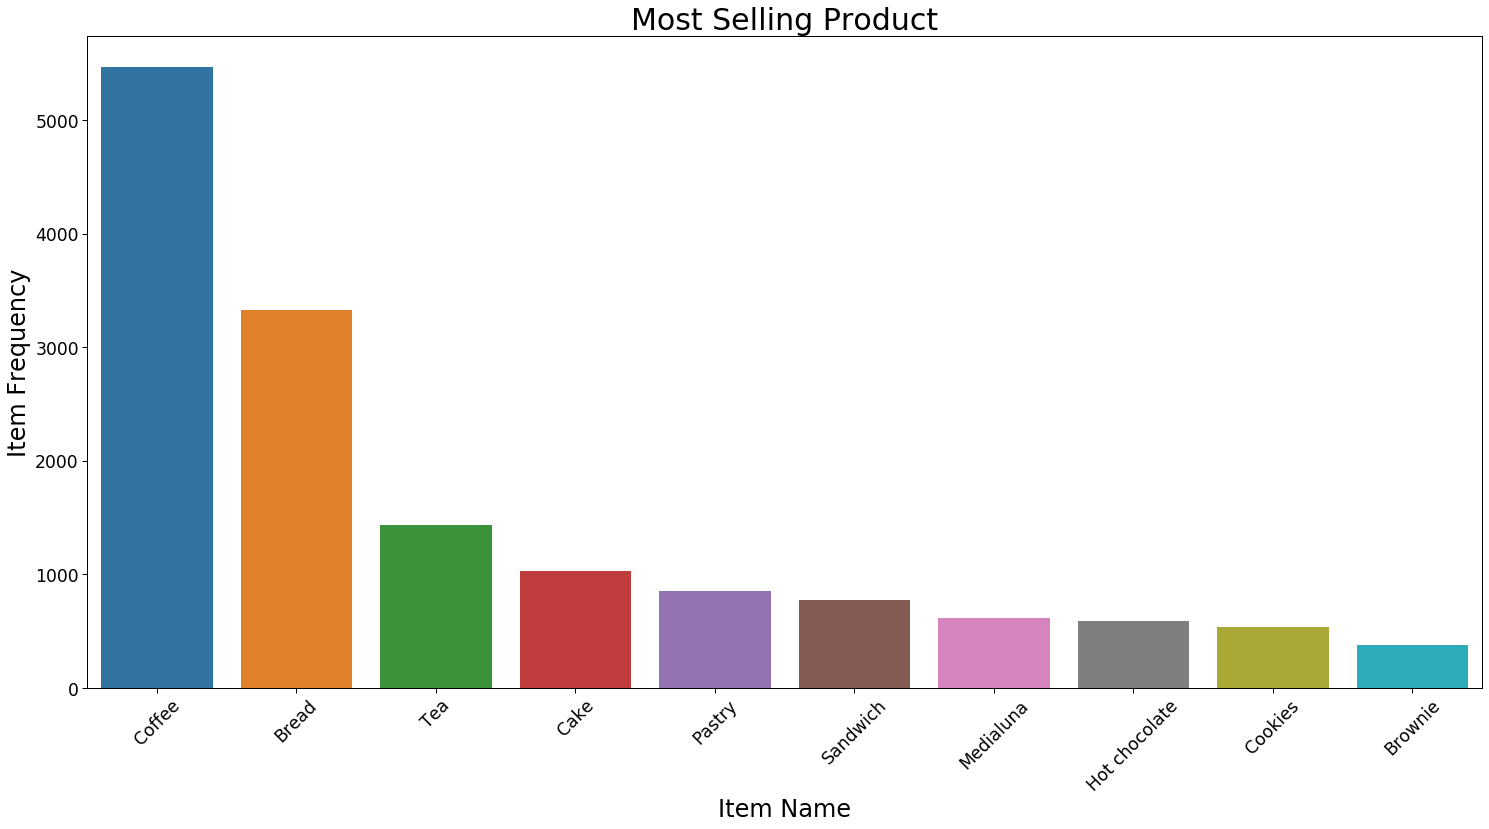

In [169]:
fig, ax = pyplot.subplots(figsize=(25,12))

sns.countplot(ax = ax, x="Item", data=df[df['Item'].isin(items)], order = items)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize='x-large')
ax.set_yticklabels(ax.get_yticks(), fontsize='x-large')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('Item Name',size=24)
ax.set_ylabel('Item Frequency',size=24)
ax.set_title("Most Selling Product", size = 30)

pyplot.show()

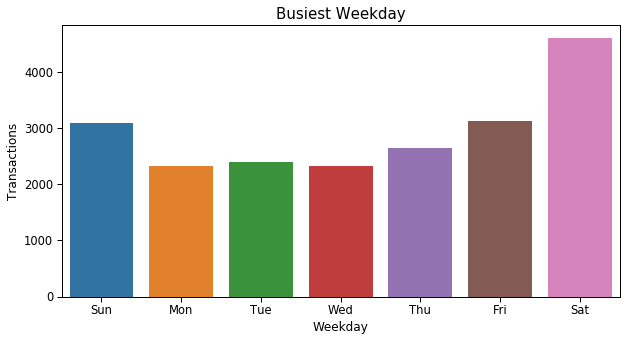

In [170]:
sns.set_context("paper", rc={"axes.labelsize":12})

fig, ax = pyplot.subplots(figsize=(10,5))

ax = sns.countplot(ax = ax, x="Weekday", data=df)

ax.set_xticklabels(ax.get_xticklabels(),fontsize='large')
ax.set_yticklabels(ax.get_yticks(), fontsize='large')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title("Busiest Weekday", size = 15)
ax.set_ylabel('Transactions')
pyplot.show()

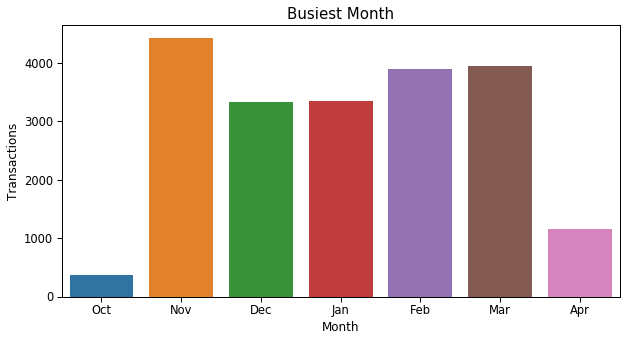

In [171]:
fig, ax = pyplot.subplots(figsize=(10,5))

ax = sns.countplot(ax = ax, x="Month", data=df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize='large')
ax.set_yticklabels(ax.get_yticks(), fontsize='large')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title("Busiest Month", size = 15)
ax.set_ylabel('Transactions')
pyplot.show()

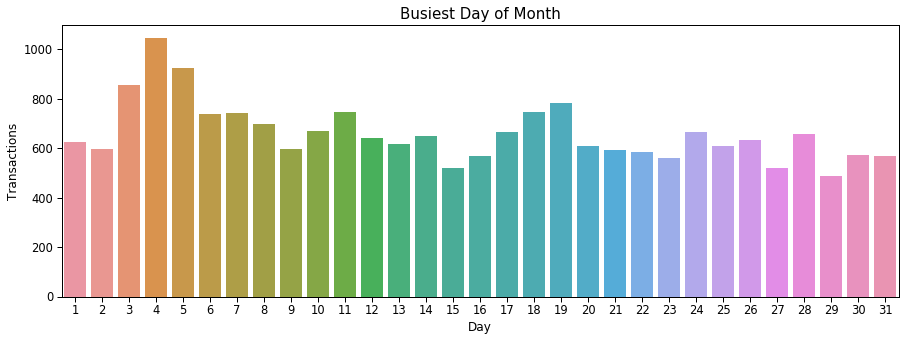

In [172]:
fig, ax = pyplot.subplots(figsize=(15,5))

ax = sns.countplot(ax = ax, x="Day", data=df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize='large')
ax.set_yticklabels(ax.get_yticks(), fontsize='large')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title("Busiest Day of Month", size = 15)
ax.set_ylabel('Transactions')
pyplot.show()

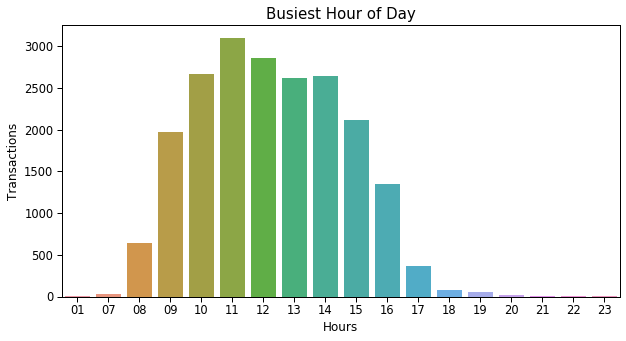

In [173]:
fig, ax = pyplot.subplots(figsize=(10,5))

ax = sns.countplot(ax = ax, x="Hours", data=df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize='large')
ax.set_yticklabels(ax.get_yticks(), fontsize='large')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title("Busiest Hour of Day", size = 15)
ax.set_ylabel('Transactions')
pyplot.show()

# Market Basket Analysis

In [174]:
#importing data
df = pd.read_csv('Dataset\Processed Data_with_none.csv')

In [175]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Day,Weekday,Hours,Mins,Secs
0,2016-10-30,09:58:11,1,Bread,2016,Oct,30,Sun,9,58,11
1,2016-10-30,10:05:34,2,Scandinavian,2016,Oct,30,Sun,10,5,34
2,2016-10-30,10:05:34,2,Scandinavian,2016,Oct,30,Sun,10,5,34
3,2016-10-30,10:07:57,3,Hot chocolate,2016,Oct,30,Sun,10,7,57
4,2016-10-30,10:07:57,3,Jam,2016,Oct,30,Sun,10,7,57


In [176]:
len(df)

21293

In [177]:
df['Transaction'].nunique()

9531

In [178]:
df['Item'].sort_values().unique()

array(['Adjustment', 'Afternoon with the baker', 'Alfajores',
       'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell',
       'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread',
       'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake',
       'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew',
       'Chicken sand', 'Chimichurri Oil', 'Chocolates',
       'Christmas common', 'Coffee', 'Coffee granules ', 'Coke',
       'Cookies', 'Crepes', 'Crisps', 'Drinking chocolate spoons ',
       'Duck egg', 'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches",
       'Empanadas', 'Extra Salami or Feta', 'Fairy Doors', 'Farm House',
       'Focaccia', 'Frittata', 'Fudge', 'Gift voucher',
       'Gingerbread syrup', 'Granola', 'Hack the stack',
       'Half slice Monster ', 'Hearty & Seasonal', 'Honey',
       'Hot chocolate', 'Jam', 'Jammie Dodgers', 'Juice',
       'Keeping It Local', 'Kids biscuit', 'Lemon and coconut',
       'Medialuna', 'Mighty Protein', 'Mineral wat

# Feature extraction

In [179]:
x = df[['Transaction','Item']].groupby(['Transaction'])['Item'].value_counts()
Y = pd.DataFrame(x)
Y = Y.rename(columns={"Item": "count"})
Y.head()

count
Transaction Item                
1           Bread              1
2           Scandinavian       2
3           Cookies            1
            Hot chocolate      1
            Jam                1

In [180]:
basket = pd.pivot_table(Y, index=['Transaction'],values = 'count',columns='Item', aggfunc='sum').fillna(0).reset_index()
basket.head()

Item,Transaction,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
len(basket)

9531

In [182]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('Transaction', inplace=True, axis=1)
basket_sets.tail()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
9526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

In [183]:
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

In [184]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Alfajores),0.475081,0.036093,0.019515,0.041078,1.138116,0.002368,1.005199
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(Tea),(Alfajores),0.141643,0.036093,0.006715,0.047407,1.313488,0.001603,1.011878
3,(Alfajores),(Tea),0.036093,0.141643,0.006715,0.186047,1.313488,0.001603,1.054553
4,(Jam),(Bread),0.014899,0.324940,0.005036,0.338028,1.040280,0.000195,1.019772


# Plots

In [185]:
confidence = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.08, 0.05, 0.01]
support =[0.05, 0.03, 0.01, 0.005]

rulesup_5 = [None] * 9
rulesup_3 = [None] * 9
rulesup_1 = [None] * 9
rulesup_ = [None] * 9

In [186]:
# Apriori algorithm with a support level of 5%
for i in range(0,len(confidence)):
    # Apriori algorithm with a support level of 5%
    rulesup_5[i] = len(rules[ (rules['support'] >= support[0]) & (rules['confidence'] >= confidence[i] )])
    
    # Apriori algorithm with a support level of 3%
    rulesup_3[i] = len(rules[ (rules['support'] >= support[1]) & (rules['confidence'] >= confidence[i] )])
    
    # Apriori algorithm with a support level of 1%
    rulesup_1[i] = len(rules[ (rules['support'] >= support[2]) & (rules['confidence'] >= confidence[i] )])
    
    # Apriori algorithm with a support level of 0.5%
    rulesup_[i] = len(rules[ (rules['support'] >= support[3]) & (rules['confidence'] >= confidence[i] )])

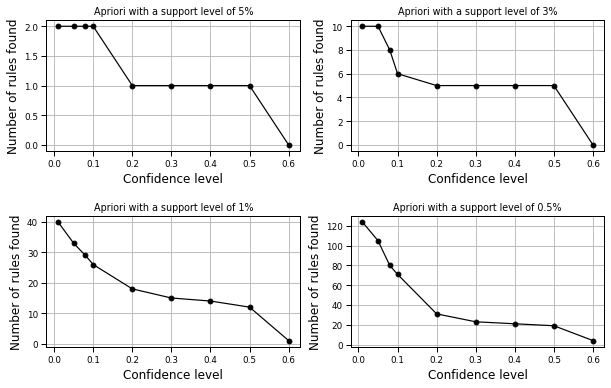

In [187]:
fig, axs = pyplot.subplots(2,2, figsize=(10,6))

pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

axs[0,0].plot(confidence,rulesup_5, marker='o', color='black')
axs[0,0].set_xlabel('Confidence level')
axs[0,0].set_ylabel('Number of rules found')
axs[0,0].set_title('Apriori with a support level of 5%')
axs[0,0].grid()

axs[0,1].plot(confidence,rulesup_3, marker='o', color='black')
axs[0,1].set_xlabel('Confidence level')
axs[0,1].set_ylabel('Number of rules found')
axs[0,1].set_title('Apriori with a support level of 3%')
axs[0,1].grid()

axs[1,0].plot(confidence,rulesup_1, marker='o', color='black')
axs[1,0].set_xlabel('Confidence level')
axs[1,0].set_ylabel('Number of rules found')
axs[1,0].set_title('Apriori with a support level of 1%')
axs[1,0].grid()

axs[1,1].plot(confidence,rulesup_, marker='o', color='black')
axs[1,1].set_xlabel('Confidence level')
axs[1,1].set_ylabel('Number of rules found')
axs[1,1].set_title('Apriori with a support level of 0.5%')
axs[1,1].grid()

fig.savefig("Apriori support levels.png")
pyplot.show()

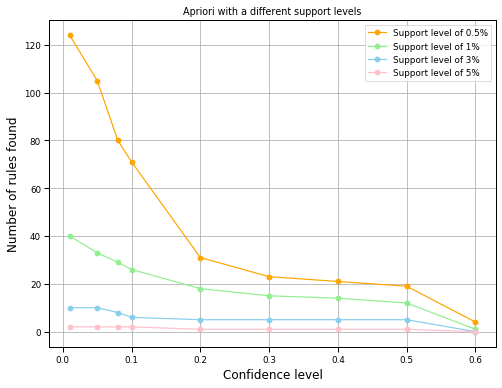

In [188]:
fig, ax = pyplot.subplots(figsize=(8,6))

ax.plot(confidence,rulesup_, marker='o', color='orange', label = 'Support level of 0.5%')
ax.plot(confidence,rulesup_1, marker='o', color='lightgreen', label = 'Support level of 1%')
ax.plot(confidence,rulesup_3, marker='o', color='skyblue', label = 'Support level of 3%')
ax.plot(confidence,rulesup_5, marker='o', color='pink', label = 'Support level of 5%')


ax.set_xlabel('Confidence level')
ax.set_ylabel('Number of rules found')
ax.set_title('Apriori with a different support levels')
ax.grid()
ax.legend()
pyplot.show()
fig.savefig("Apriori with a different support levels.png")

# Sales Forecasting

In [189]:
#importing data
df = pd.read_csv('Dataset\Processed Data_with_none.csv')

In [190]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Day,Weekday,Hours,Mins,Secs
0,2016-10-30,09:58:11,1,Bread,2016,Oct,30,Sun,9,58,11
1,2016-10-30,10:05:34,2,Scandinavian,2016,Oct,30,Sun,10,5,34
2,2016-10-30,10:05:34,2,Scandinavian,2016,Oct,30,Sun,10,5,34
3,2016-10-30,10:07:57,3,Hot chocolate,2016,Oct,30,Sun,10,7,57
4,2016-10-30,10:07:57,3,Jam,2016,Oct,30,Sun,10,7,57


# Model Features

In [191]:
df['Date'] = pd.to_datetime(df['Date'])

In [192]:
df = df[df['Item'] == 'Coffee']

In [193]:
len(df)

5471

In [194]:
df.dtypes

Date           datetime64[ns]
Time                   object
Transaction             int64
Item                   object
Year                    int64
Month                  object
Day                     int64
Weekday                object
Hours                   int64
Mins                    int64
Secs                    int64
dtype: object

In [195]:
sales = pd.DataFrame(df.groupby('Date')['Date'].count())
sales = sales.rename(columns={"Date": "Sales"})

In [196]:
sales.head()

,Sales
Date,
2016-10-30,33
2016-10-31,60
2016-11-01,38
2016-11-02,42
2016-11-03,40


In [197]:
sdate=df['Date'].min()
edate=df['Date'].max()
sdate, edate

(Timestamp('2016-10-30 00:00:00'), Timestamp('2017-04-09 00:00:00'))

In [198]:
date_range = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
date_range

DatetimeIndex(['2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02',
               '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06',
               '2016-11-07', '2016-11-08',
               ...
               '2017-03-30', '2017-03-31', '2017-04-01', '2017-04-02',
               '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08'],
              dtype='datetime64[ns]', length=161, freq='D')

In [199]:
data_set = pd.DataFrame()
data_set['Date'] = date_range
data_set= data_set.merge(sales, on = 'Date', how = 'left').fillna(0)
len(data_set)

161

In [200]:
#data_set['Month'] = data_set['Date'].dt.month
data_set['Day'] = data_set['Date'].dt.day
data_set['Weekday'] = data_set['Date'].dt.weekday

del data_set['Date']

data_set.tail(10)

,Sales,Day,Weekday
151,33.0,30,3
152,41.0,31,4
153,39.0,1,5
154,32.0,2,6
155,35.0,3,0
156,40.0,4,1
157,30.0,5,2
158,27.0,6,3
159,29.0,7,4
160,41.0,8,5


# Modelling

In [201]:
X = data_set.drop('Sales', axis=1)
y = data_set['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
clf = svm.SVR(C=1, kernel='linear', degree=8, gamma='scale', coef0=10)
clf.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=10, degree=8, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predictions

In [203]:
predictions = clf.predict(X_test)

In [204]:
predictions

array([39.12352941, 31.08823529, 29.01764706, 36.98235294, 31.25294118,
       26.93529412, 31.17058824, 29.02941176, 29.18235294, 31.00588235,
       35.05294118, 39.00588235, 27.1       , 31.21764706, 30.99411765,
       28.92352941, 29.18235294, 26.94705882, 39.20588235, 29.08823529,
       35.11176471, 33.06470588, 35.13529412, 29.17058824, 30.91176471,
       34.9       , 37.21764706, 38.97058824, 37.13529412, 37.13529412,
       33.07647059, 27.07647059, 32.92352941])

In [205]:
print(f'Model fit results:\n'
      f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}'
      f'\nEVS: {explained_variance_score(y_test, predictions)}'f'\nMAE: {mean_absolute_error(y_test, predictions)}'
      f'\nMAD: {median_absolute_error(y_test, predictions)}'f'\nME: {max_error(y_test, predictions)}')

Model fit results:
RMSE: 11.433381266844762
EVS: 0.1139022689406265
MAE: 7.768805704099775
MAD: 5.170588235294318
ME: 38.97058823529416


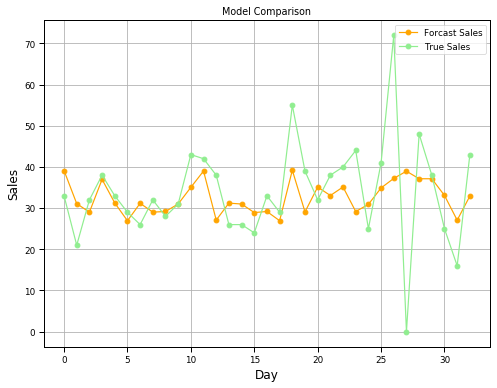

In [206]:
fig, ax = pyplot.subplots(figsize=(8,6))

ax.plot(predictions, marker='o', color='orange', label = 'Forcast Sales')
ax.plot(y_test.to_list(), marker='o', color='lightgreen', label = 'True Sales')

ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Model Comparison')
ax.grid()
ax.legend()
pyplot.show()
fig.savefig("Model Results-Coffee.png")